<a href="https://colab.research.google.com/github/BlackHazard111/DL-Lab/blob/main/Pr2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

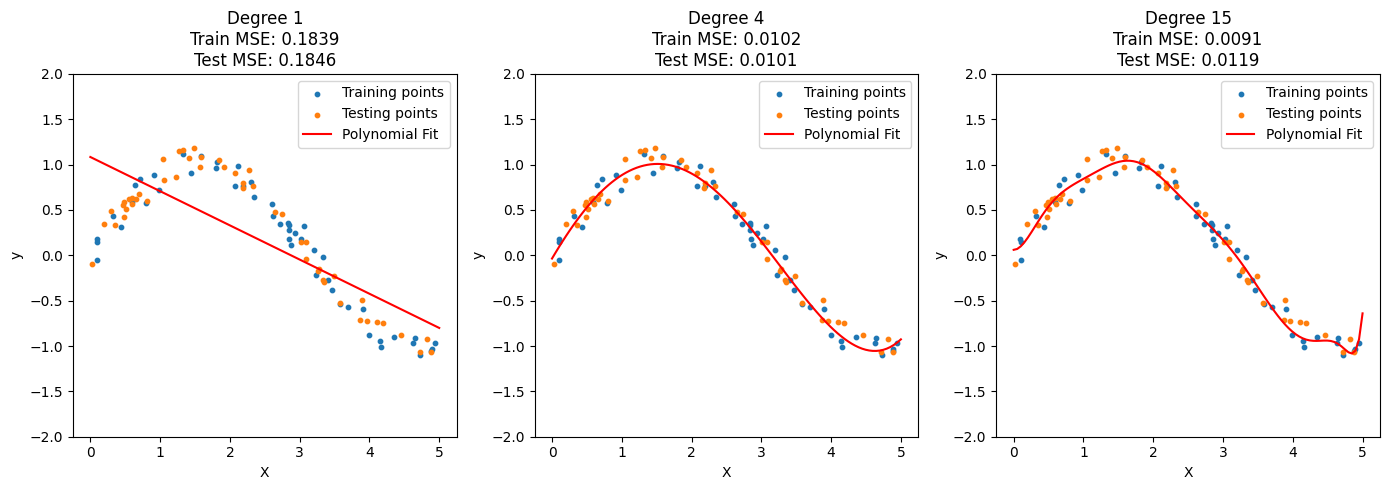

In [ ]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(10`0, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Function to train and evaluate polynomial regression models
def train_and_evaluate(degree, X_train, y_train, X_test, y_test):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Train Linear Regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train)

    # Make predictions
    y_train_pred = lin_reg.predict(X_train_poly)
    y_test_pred = lin_reg.predict(X_test_poly)

    # Calculate Mean Squared Error
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    return lin_reg, train_mse, test_mse, poly_features

# Experiment with different polynomial degrees
degrees = [1, 4, 15]
plt.figure(figsize=(14, 5))

for i, degree in enumerate(degrees):
    plt.subplot(1, len(degrees), i + 1)
    lin_reg, train_mse, test_mse, poly_features = train_and_evaluate(degree, X_train, y_train, X_test, y_test)

    # Plot results
    X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
    X_plot_poly = poly_features.transform(X_plot)
    y_plot = lin_reg.predict(X_plot_poly)

    plt.scatter(X_train, y_train, s=10, label="Training points")
    plt.scatter(X_test, y_test, s=10, label="Testing points")
    plt.plot(X_plot, y_plot, color='r', label="Polynomial Fit")
    plt.title(f"Degree {degree}\nTrain MSE: {train_mse:.4f}\nTest MSE: {test_mse:.4f}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.ylim((-2, 2))
    plt.legend()

plt.tight_layout()
plt.show()